## Final Project Submission

Please fill out:
* Student name: Jonah Flateman 
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


## Module 1 Project

### Part 1 - Importing and Cleaning

Let's import the files we want to work with as DataFrames.  The files selected incorporate budget information, title/year/genre/rating, and studio information.  First is the Numbers movie budgets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Import and display head and info
df_tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Removing the dollar signs and commas, and converting from string to integer for three columns.

In [4]:
df_tn['production_budget'] = df_tn['production_budget'].str.replace('$', '')
df_tn['production_budget'] = df_tn['production_budget'].str.replace(',', '')
df_tn['domestic_gross'] = df_tn['domestic_gross'].str.replace('$', '')
df_tn['domestic_gross'] = df_tn['domestic_gross'].str.replace(',', '')
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace('$', '')
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace(',', '')

df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [5]:
df_tn['production_budget'] = df_tn['production_budget'].astype(int)
df_tn['domestic_gross'] = df_tn['domestic_gross'].astype(int)
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].astype(int)
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


Now to check for duplicates and null values.

In [6]:
duplicates_df_tn = df_tn[df_tn.duplicated()]
len(duplicates_df_tn)
df_tn.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

Let's repeat the process for the remaining DataFrames.

In [7]:
df_imdb_title = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df_imdb_title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
df_imdb_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [9]:
duplicates_df_imdb_title = df_imdb_title[df_imdb_title.duplicated()]
len(duplicates_df_imdb_title)
df_imdb_title.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [10]:
df_imdb_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
df_imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
df_imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [12]:
duplicates_df_imdb_ratings = df_imdb_ratings[df_imdb_ratings.duplicated()]
len(duplicates_df_imdb_ratings)
df_imdb_ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

### Part 2 - Merging the DataFrames

Next we will drop selected columns prior to joining the DataFrames.

In [13]:
df_tn = df_tn.drop(['id'], axis=1)
df_tn.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [14]:
df_imdb_title = df_imdb_title.drop(['original_title', 'start_year'], axis=1)
df_imdb_title.head()

,tconst,primary_title,runtime_minutes,genres
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,122.0,Drama
3,tt0069204,Sabse Bada Sukh,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"


In [15]:
#Outer merge on common 'tconst' column
df_imdb_merged = df_imdb_title.merge(df_imdb_ratings, on='tconst', how='outer')
df_imdb_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   runtime_minutes  114405 non-null  float64
 3   genres           140736 non-null  object 
 4   averagerating    73856 non-null   float64
 5   numvotes         73856 non-null   float64
dtypes: float64(3), object(3)
memory usage: 7.8+ MB


We will investigate the shape of the DataFrames and change the movie title column to "movie" prior to the next merge.

In [16]:
#Using .rename() method for column
df_imdb_merged = df_imdb_merged.rename(columns={'primary_title': 'movie'})

In [17]:
print(df_tn.shape)
print(df_imdb_merged.shape)

(5782, 5)
(146144, 6)


In [18]:
#Second outer merge on renamed column
df_complete = df_tn.merge(df_imdb_merged, on='movie', how='outer')
df_complete.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,averagerating,numvotes
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,93.0,Horror,6.1,43.0
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,136.0,"Action,Adventure,Fantasy",6.6,447624.0
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,NaN,NaN,NaN,NaN,NaN


### Part 3 - Cleaning up and creating a final DataFrame for EDA

Rather than domestic or worldwide gross, let's create a column for return on investment, labeled 'ROI,' to use as a key metric in our analysis.

In [19]:
#Subtract Production Budget from Worldwide Gross for new ROI column and sort by ROI descending with index reset
df_complete['ROI'] = df_complete['worldwide_gross'] - df_complete['production_budget']
df_complete_roi_sorted = df_complete.sort_values('ROI', ascending=False).reset_index()
df_complete_roi_sorted.head(10)

,index,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,averagerating,numvotes,ROI
0,0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,93.0,Horror,6.1,43.0,2.351345e+09
1,54,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,tt2495766,NaN,Adventure,6.2,20.0,2.008208e+09
2,55,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,tt8852130,115.0,Family,NaN,NaN,2.008208e+09
3,6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0,1.748134e+09
4,5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,NaN,NaN,NaN,NaN,NaN,1.747311e+09
5,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,tt0369610,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,1.433855e+09
6,85,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,tt2820852,137.0,"Action,Crime,Thriller",7.2,335074.0,1.328723e+09
7,26,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,tt0848228,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0,1.292936e+09
8,388,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,NaN,NaN,NaN,NaN,NaN,1.216693e+09
9,53,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,tt1825683,134.0,"Action,Adventure,Sci-Fi",7.3,516148.0,1.148258e+09


Below, we will:
    
* Remove duplicate movie titles using a groupby, and take only the first instance of the movie title
   
* Drop NaN values and columns that will not figure into our EDA
  
* Slice the "release_date" column so that only the year is displayed, convert to integer type and rename the column

* Sort by our ROI column and reset the index

In [20]:
df_complete_roi_sorted_no_dupes = df_complete_roi_sorted.groupby('movie').first()
df_complete_roi_sorted_no_dupes = df_complete_roi_sorted_no_dupes.sort_values('ROI', ascending=False).reset_index()
df_complete_roi_sorted_no_dupes = df_complete_roi_sorted_no_dupes.dropna().reset_index()
df_complete_roi_sorted_no_dupes['release_date'] = df_complete_roi_sorted_no_dupes['release_date'].str[7:12]
df_complete_roi_sorted_no_dupes['release_date'] = df_complete_roi_sorted_no_dupes['release_date'].astype(int)
df_complete_roi_sorted_no_dupes = df_complete_roi_sorted_no_dupes.rename(columns={'release_date': 'release_year'})
df_complete_roi_sorted_no_dupes = df_complete_roi_sorted_no_dupes.drop(['index', 'tconst', 'level_0'], axis=1)
df_complete_roi_sorted_no_dupes.head(10)

,movie,release_year,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,averagerating,numvotes,ROI
0,Avatar,2009,425000000.0,760507625.0,2.776345e+09,93.0,Horror,6.1,43.0,2.351345e+09
1,Titanic,1997,200000000.0,659363944.0,2.208208e+09,115.0,Adventure,6.2,20.0,2.008208e+09
2,Avengers: Infinity War,2018,300000000.0,678815482.0,2.048134e+09,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0,1.748134e+09
3,Jurassic World,2015,215000000.0,652270625.0,1.648855e+09,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,1.433855e+09
4,Furious 7,2015,190000000.0,353007020.0,1.518723e+09,137.0,"Action,Crime,Thriller",7.2,335074.0,1.328723e+09
5,The Avengers,2012,225000000.0,623279547.0,1.517936e+09,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0,1.292936e+09
6,Black Panther,2018,200000000.0,700059566.0,1.348258e+09,134.0,"Action,Adventure,Sci-Fi",7.3,516148.0,1.148258e+09
7,Jurassic World: Fallen Kingdom,2018,170000000.0,417719760.0,1.305773e+09,128.0,"Action,Adventure,Sci-Fi",6.2,219125.0,1.135773e+09
8,Frozen,2013,150000000.0,400738009.0,1.272470e+09,102.0,"Adventure,Animation,Comedy",7.5,516998.0,1.122470e+09
9,Beauty and the Beast,2017,160000000.0,504014165.0,1.259200e+09,60.0,"Family,Fantasy,Musical",7.2,238325.0,1.099200e+09


### Part 4 - Questions, Answers, and Visualizations

For a starter visualization, let's have a look at the 10 highest ROIs.

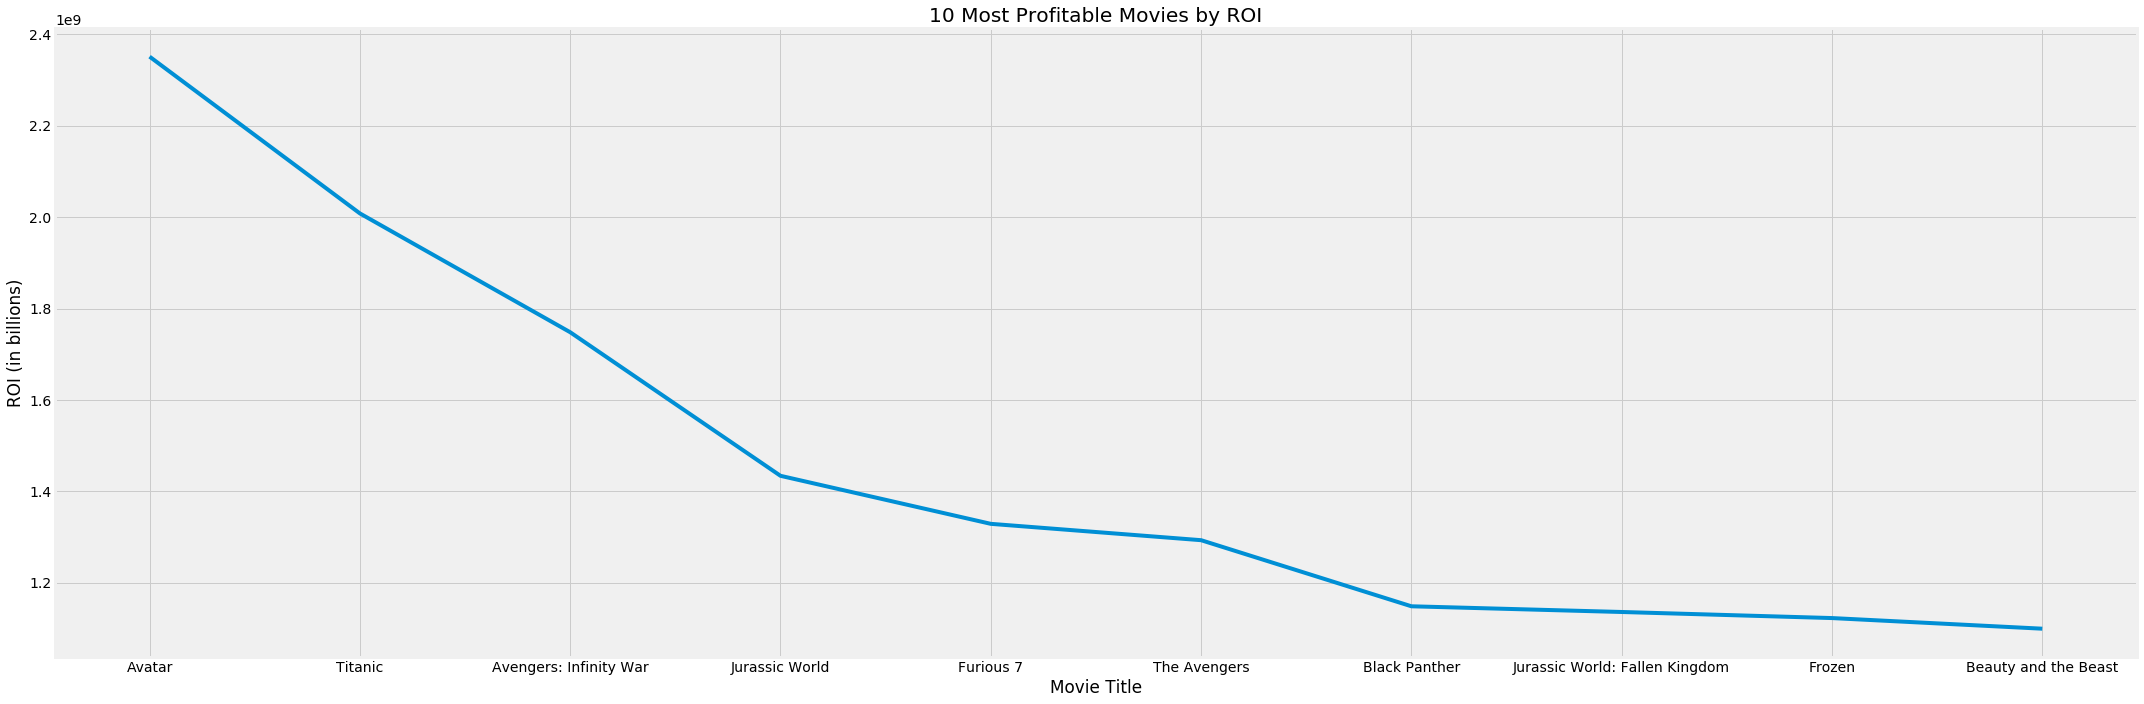

In [21]:
#Use 'movie' for x-axis and 'ROI' for y-axis
plt.figure(figsize=(30,10))
plt.style.use('fivethirtyeight')
plt.plot(df_complete_roi_sorted_no_dupes.movie.head(10), df_complete_roi_sorted_no_dupes.ROI.head(10))
plt.title('10 Most Profitable Movies by ROI')
plt.xlabel('Movie Title')
plt.ylabel('ROI (in billions)')
plt.tight_layout()
plt.show()

How about the year of release?  Let's look at the top 50 using a histogram, making sure our ticks cover years needed.

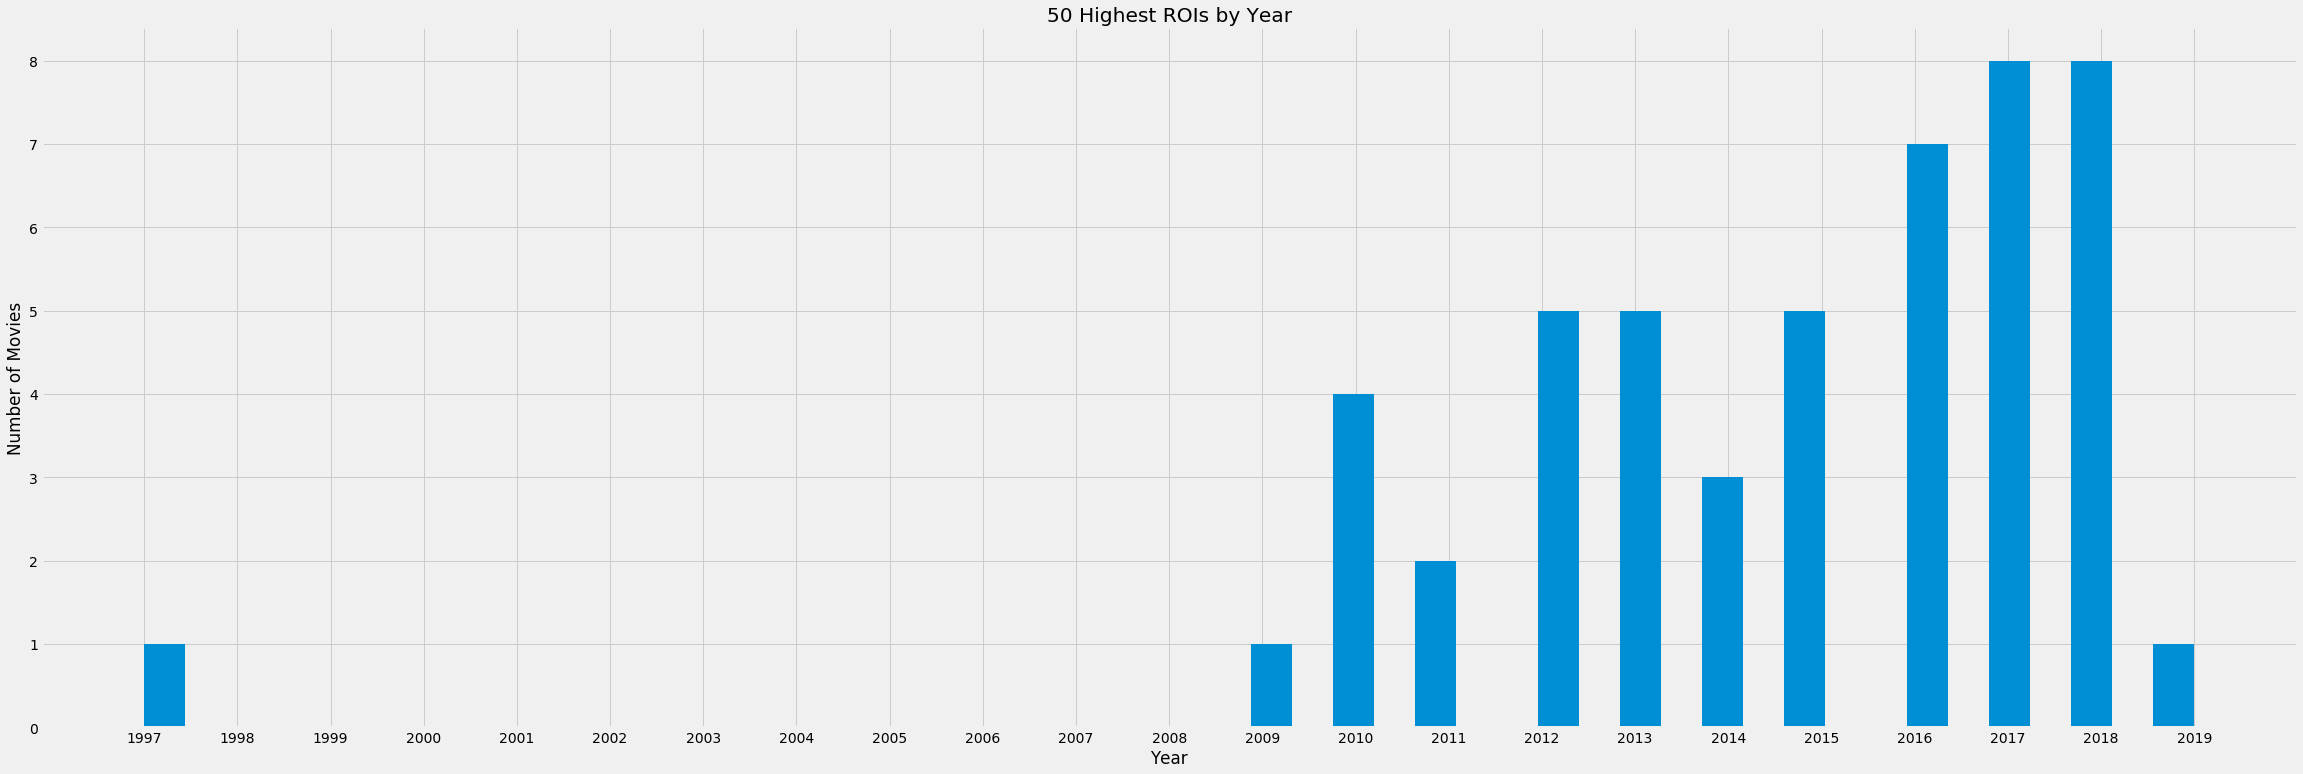

In [22]:
#Yearly xticks from first year with data to present
df_complete_roi_sorted_no_dupes.head(50).hist(column='release_year', figsize=(36,12), bins=50)
plt.style.use('fivethirtyeight')
plt.xlabel("Year")
plt.xticks(np.arange(1997, 2020, step=1))
plt.ylabel("Number of Movies")
plt.title("50 Highest ROIs by Year")
plt.show()

So ROI alone may not be the best metric for our final business decisions, as it tends to skew higher for newer releases.

Let's dive in further by looking at our production budgets using a scatterplot.

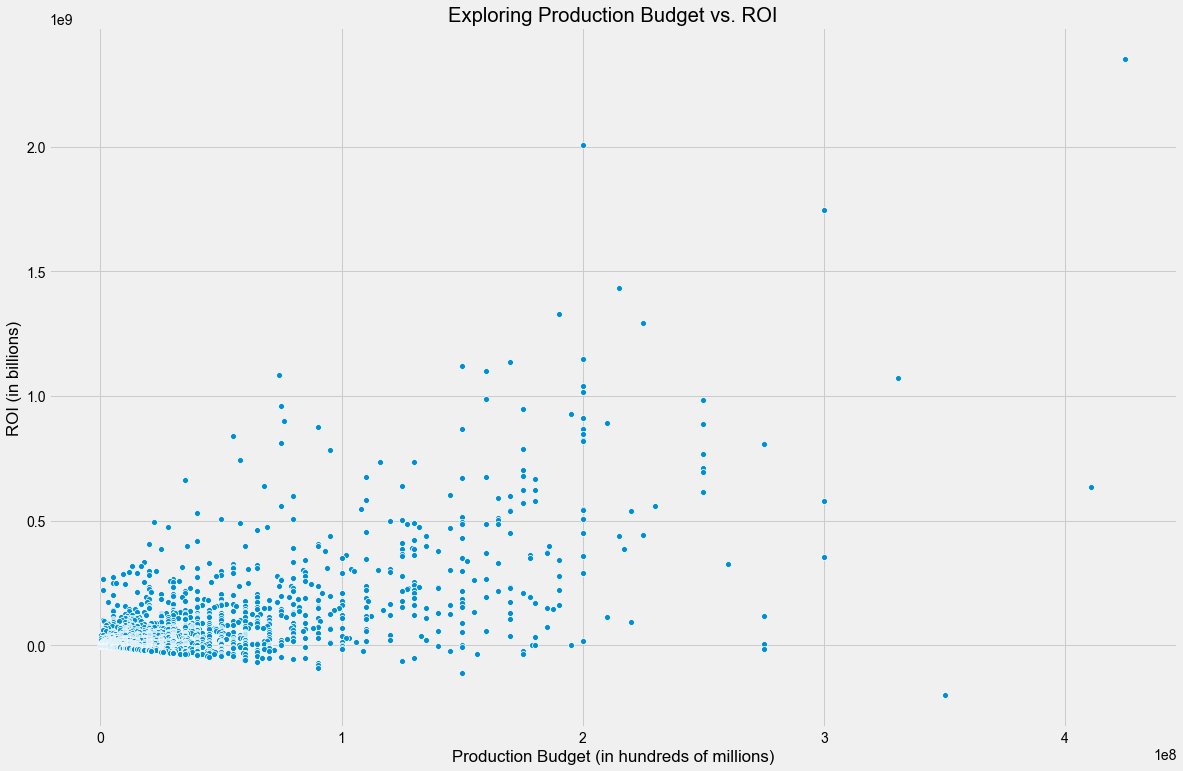

In [23]:
fig, ax = plt.subplots(figsize=(18,12))
ax = sns.scatterplot('production_budget', 'ROI', data=df_complete_roi_sorted_no_dupes)
ax.set(xlabel='Production Budget (in hundreds of millions)', ylabel='ROI (in billions)', title='Exploring Production Budget vs. ROI')
sns.set(style='whitegrid', font_scale=1.5)
plt.show()

While we do see a general correlation between higher production budget and higher ROI, money is no guarantee of success.

How can we narrow down our focus further?  Let's look at the top 10% of ROIs from our DataFrame.  Which genres are doing the best?

We will create a dictionary and use nested for loops to iterate over the 'genres' column, and then each value - taking into account that some values have multiple genres which will need to be split.

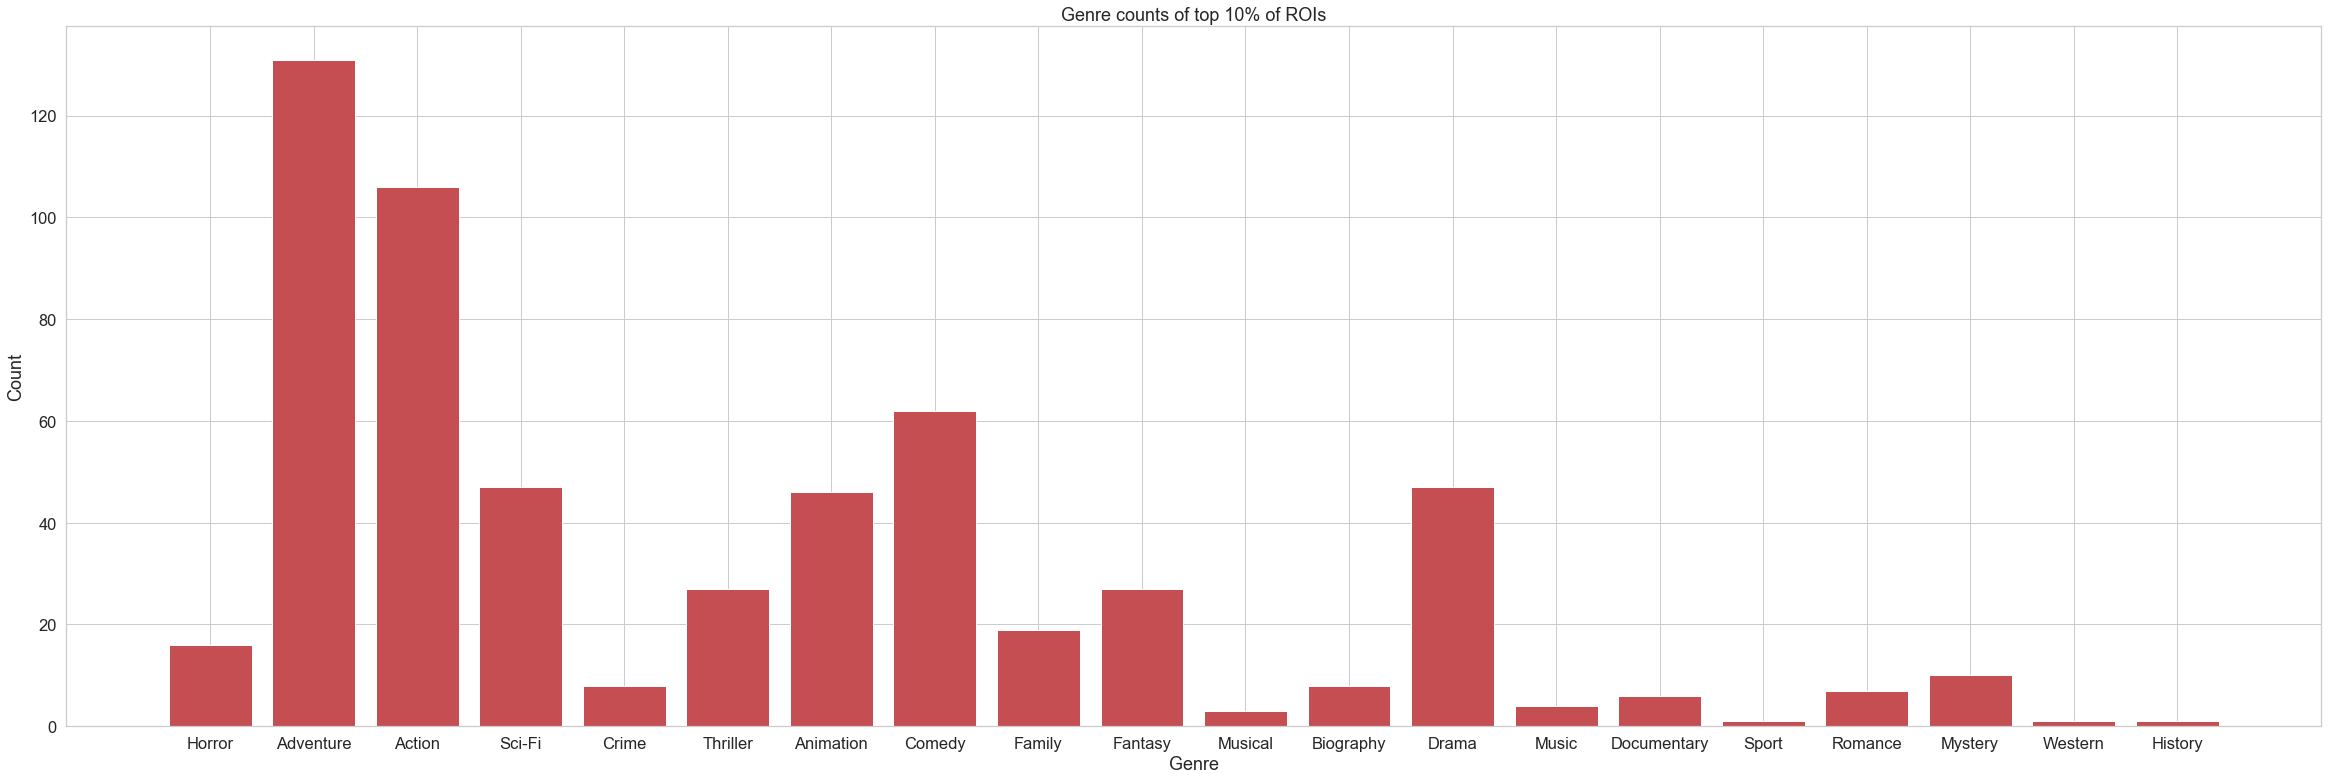

In [24]:
#Start with empty dictionary, iterate over 'genres' column
#Split values with multiple genres separated by comma
#Add genre counts to dictionary with if/else statement
genre_dict = {}
for genres in df_complete_roi_sorted_no_dupes.head(210)['genres']:
    for genre in genres.split(','):
        if genre in genre_dict:
            genre_dict[genre] += 1
        else:
            genre_dict[genre] = 1
fig, ax = plt.subplots(figsize=(36,12))
ax = plt.bar(list(genre_dict.keys()), genre_dict.values(), color='r')
plt.title('Genre counts of top 10% of ROIs')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

As we might expect, Action and Adventure movies give us higher ROIs.  Our business sense and our data will show us that the production budgets for these films will also tend to be higher.  We also see Comedy and Drama with respectable showings - for cost-conscious production, should we explore the success of these genres further?

Let's use comedies as an example and create an unstacked bar plot.  We will use a dataframe of comedies and specific columns only with the movie title as our x-axis.

Text(0, 0.5, 'Dollar Amount (in Hundreds of Millions)')

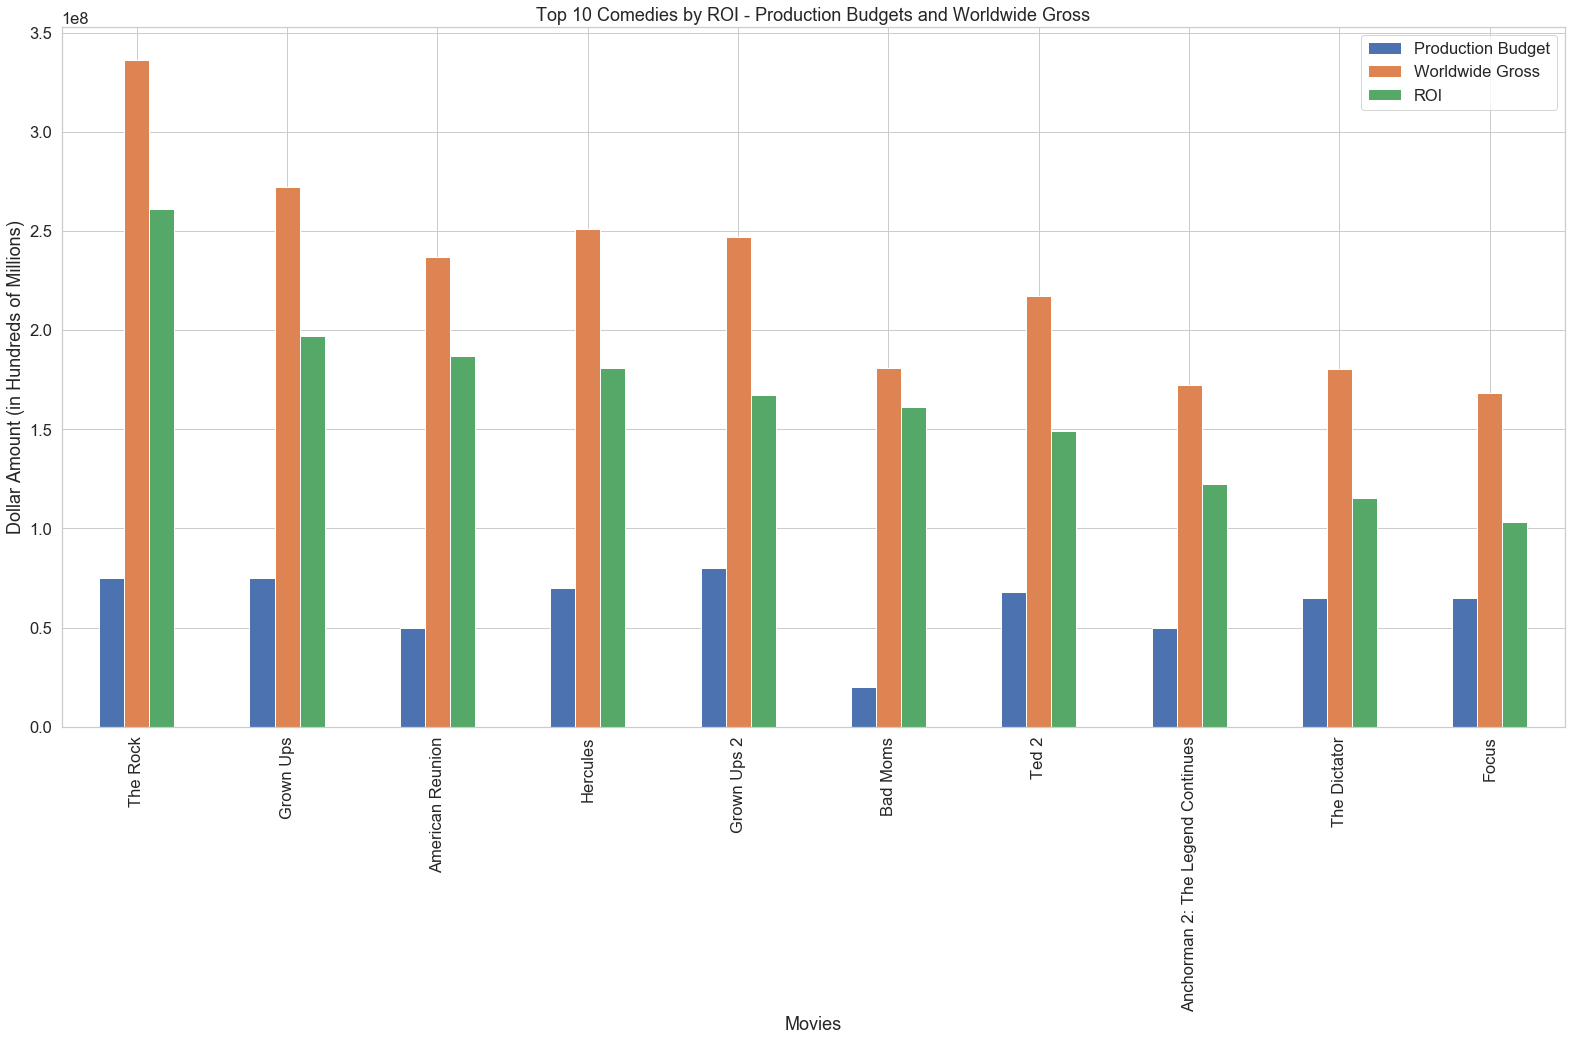

In [25]:
#Create new DataFrame for 'Comedy' genre only sorted by ROI
#Drop columns not to be used in bar plot and use 'moivie' as index
df_comedies = df_complete_roi_sorted_no_dupes.loc[df_complete_roi_sorted_no_dupes['genres'] == "Comedy"].sort_values('ROI', ascending=False).reset_index()
df_comedies = df_comedies.drop(['index', 'release_year', 'domestic_gross', 'runtime_minutes', 'averagerating', 'genres', 'numvotes'], axis=1)
df_comedies = df_comedies.rename(columns={'production_budget': 'Production Budget', 'worldwide_gross': 'Worldwide Gross'})
df_comedies = df_comedies.set_index('movie')
df_comedies.head(10).plot(kind="bar", figsize=(24,12))
plt.title('Top 10 Comedies by ROI - Production Budgets and Worldwide Gross')
plt.xlabel('Movies')
plt.ylabel('Dollar Amount (in Hundreds of Millions)')

These 10 movie could be key in our new studio - more modest production budgets and high ROIs.

We may also want to consider our user rating data.  Does a higher user rating translate to a larger ROI?
A boxplot can help visualize our interquartile range and identify outliers.
For this purpose we will change the type of our 'averagerating' column to integer.

In [26]:
df_complete_roi_sorted_no_dupes['averagerating'] = df_complete_roi_sorted_no_dupes['averagerating'].astype(int)

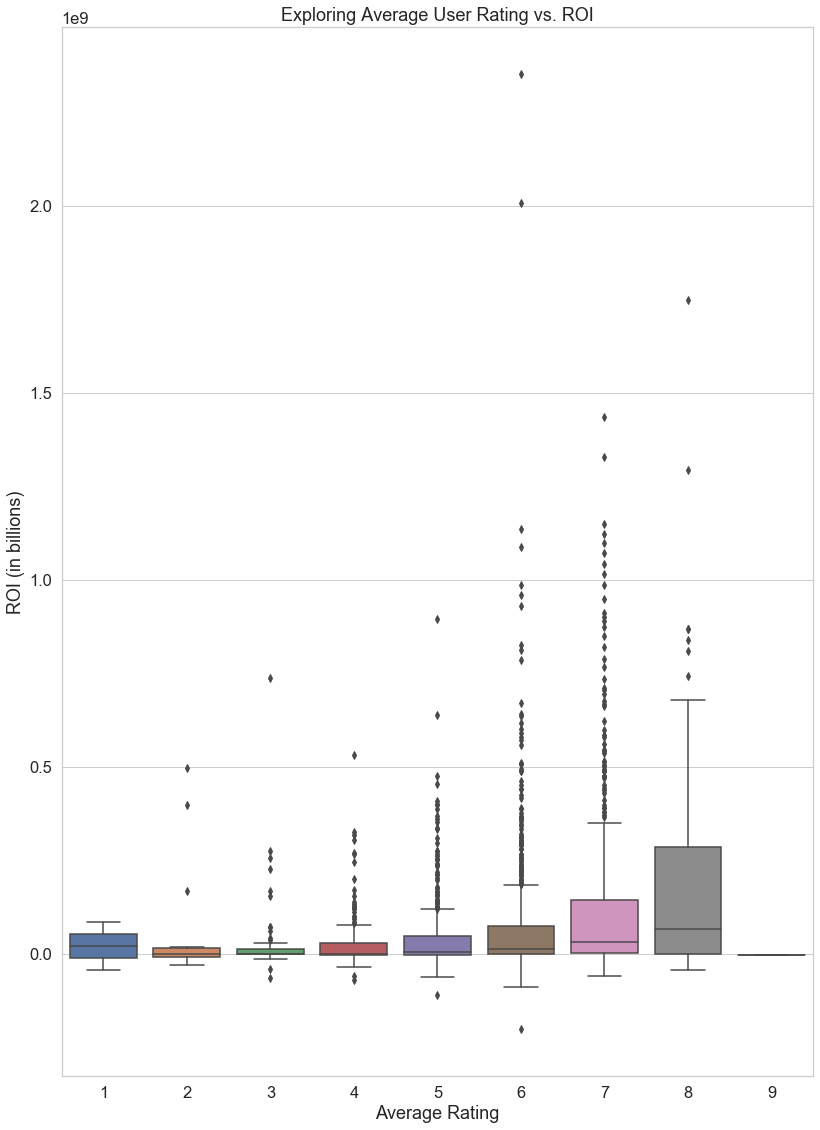

In [27]:
fig, ax = plt.subplots(figsize=(12,18))
ax = sns.boxplot('averagerating', 'ROI', data=df_complete_roi_sorted_no_dupes)
ax.set(xlabel='Average Rating', ylabel='ROI (in billions)', title='Exploring Average User Rating vs. ROI')
sns.set(style='darkgrid', font_scale=1.5)
plt.show()

While some users may be more apt to give a movie a 1 to skew its score, we see an overall rise in ROI (and outliers) the higher our user rating.

However, we should take into account that the number of ratings may be skewing the above boxplot.  Let's use a scatterplot to show ROI for movies with 10,000 or more votes only.  We will create a new column, 'numvotes_over_10000,' for this purpose.

In [28]:
df_complete_roi_sorted_no_dupes['numvotes_over_10000'] = df_complete_roi_sorted_no_dupes['numvotes'].loc[df_complete_roi_sorted_no_dupes['numvotes'] >= 10000]

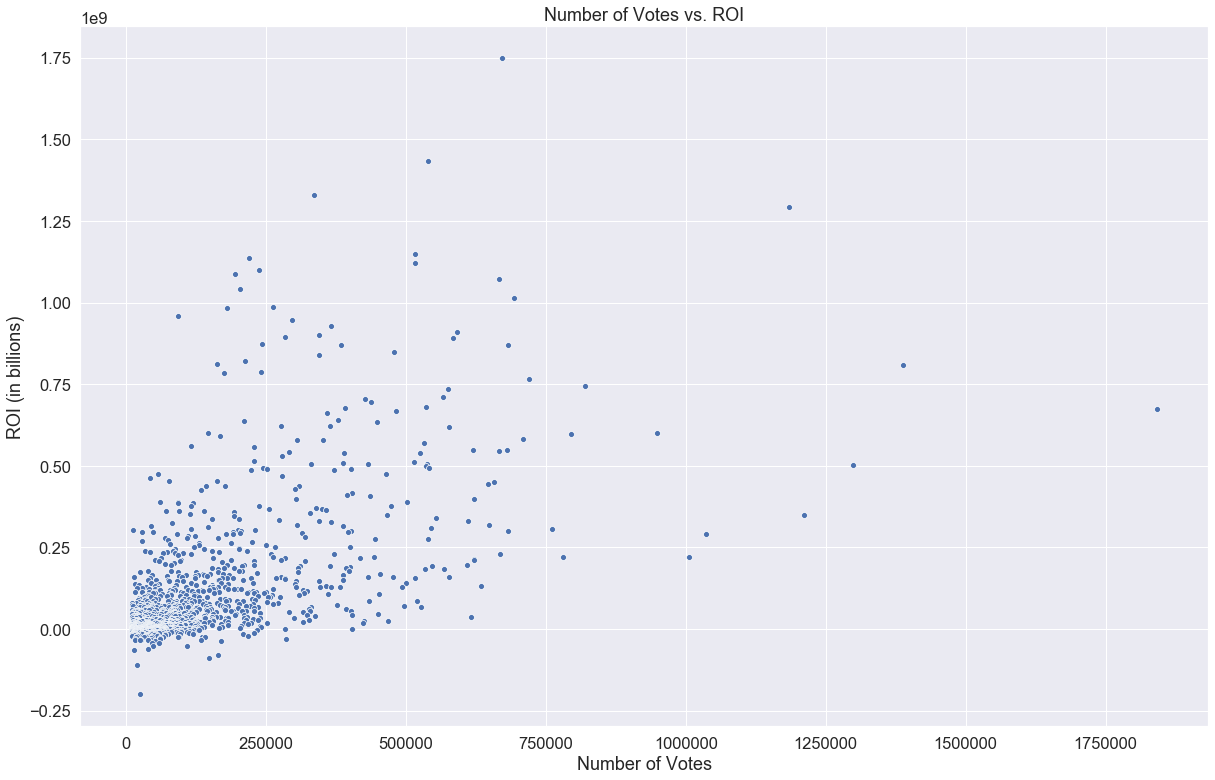

In [29]:
fig, ax = plt.subplots(figsize=(18,12))
ax = sns.scatterplot('numvotes_over_10000', 'ROI', data=df_complete_roi_sorted_no_dupes)
ax.set(xlabel='Number of Votes', ylabel='ROI (in billions)', title='Number of Votes vs. ROI')
sns.set(style='darkgrid', font_scale=1.5)
plt.show()

So there may not be a direct correlation between more votes and higher ROI, however we can use this new dataset to reduce outliers on our analysis of user ratings.